Installing all the dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style(style = "darkgrid")
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [2]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python\\04. ML project Approach'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python'

### Step - 1: Understanding the Business Requirements and Nature of the Data

Most Machine Learning models are trained to serve a real-world use case. It's important to understand the business requirements, modelling objective and the nature of the data available before you start building a machine learning model.

##### Understand the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders ad identify following.
1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impcat will it have on the business?
3. How is this problem solved currently, without any machine learning model?
4. Who will use this the results of this model, and how does it fit into other business processess?
5. How much historical data do we have and how it is collected?
6. What features does the historical data contain? Does it contain the historical data that we are trying to predict?
7. What are some known issues with the data (data entry errors, missing data, differences in units, etc.)?
8. Can we look at some samples rows deom the data? How representative are they of the entrire data?
9. Where is the data is stored and how will you get access to it?

### Step - 2: Classify the problem as Supervised/unsupervised and regression/classification

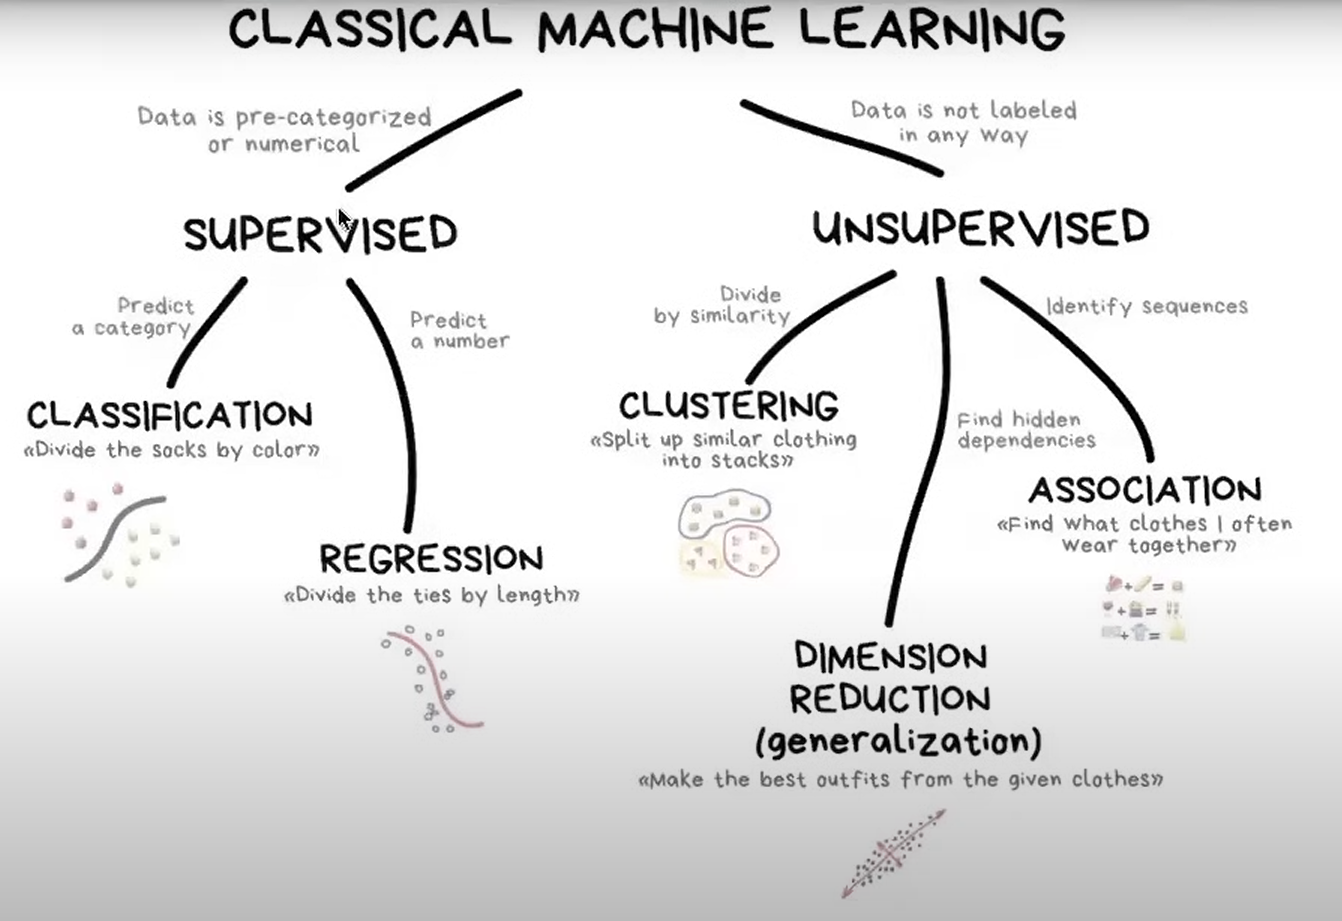

##### Loss functions and Evaluation Metrics

Once you have identified the type of preoblem you're solving, you need to pick an appropriate evaluation metric. Also, on the type of model you train, your model will also use loss function to optimize during the training process.

- **Evaluation Metrics:** They're used by humans to evaluate ML model.
- **Loss Functions:** They're used by computers to evaluate ML model.

### Step - 3: Download, clean and Explore the data and create new features

##### Downloading the data

There may be sources to get the data:
- CSV files
- SQL databases
- Raw File URL's
- Kaggle datasets
- Google drive
- Dropbox

In [7]:
od.download("https://www.kaggle.com/c/rossmann-store-sales", data_dir = "Dataset/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading rossmann-store-sales.zip to Dataset/rossmann-store-sales


100%|██████████| 6.99M/6.99M [00:00<00:00, 31.7MB/s]



Extracting archive Dataset/rossmann-store-sales/rossmann-store-sales.zip to Dataset/rossmann-store-sales


In [8]:
os.listdir("Dataset/rossmann-store-sales/")

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [9]:
ross_df = pd.read_csv("Dataset/rossmann-store-sales/train.csv", low_memory = False)

In [10]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
